In [1]:
import numpy as np
import scarlet
import scarlet.display
from scarlet.display import AsinhMapping
from scarlet.initialization import build_initialization_coadd

from astropy.wcs import WCS
from astropy.nddata import Cutout2D


import pylab as plt
import astropy.io.fits as fits
from astropy.io import fits as pf
from astropy.visualization import astropy_mpl_style
import os, re

%matplotlib inline

plt.style.use(astropy_mpl_style)

import matplotlib
import matplotlib.pyplot as plt

# use a better colormap and don't interpolate the pixels
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

from astropy.nddata import Cutout2D
import warnings
warnings.simplefilter("ignore")


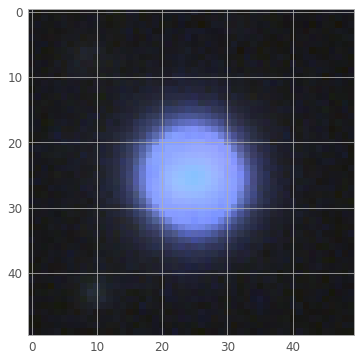

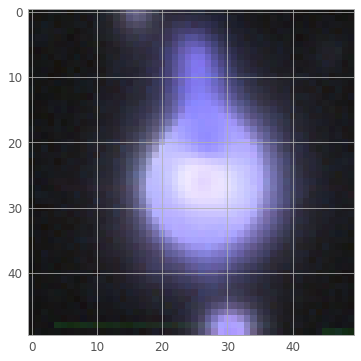

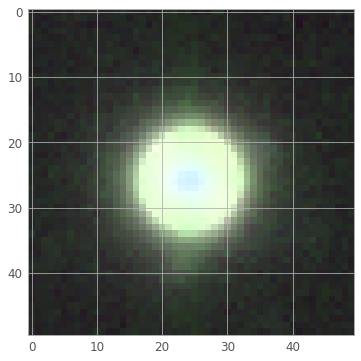

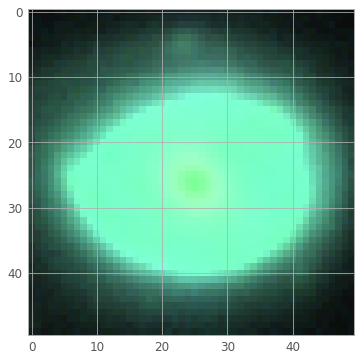

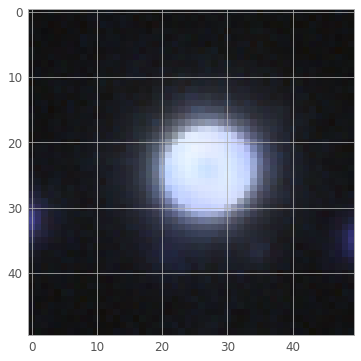

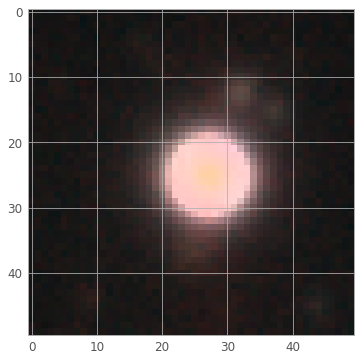

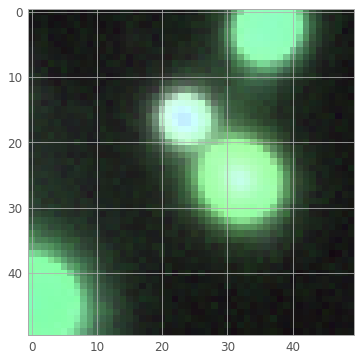

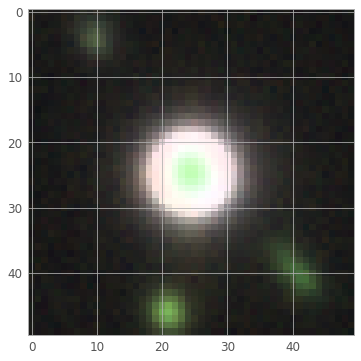

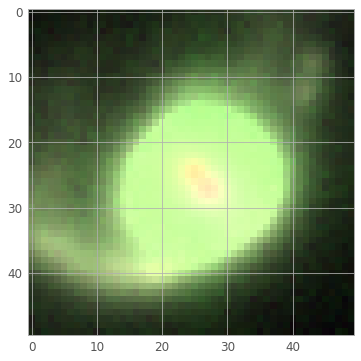

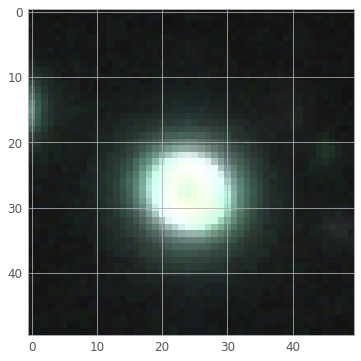

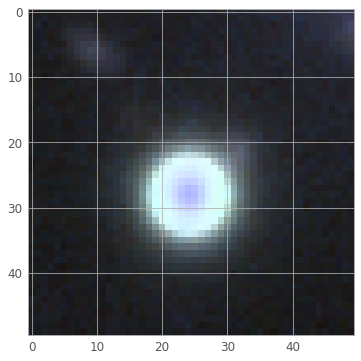

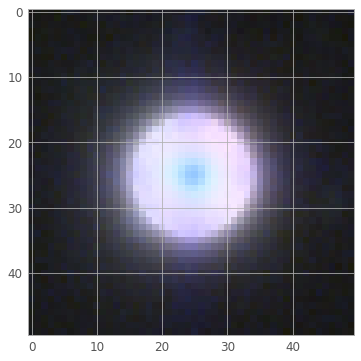

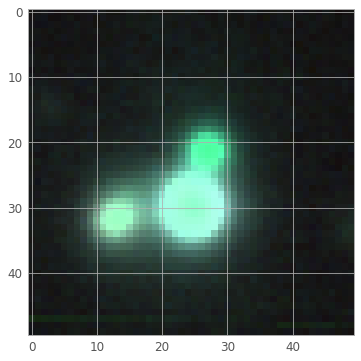

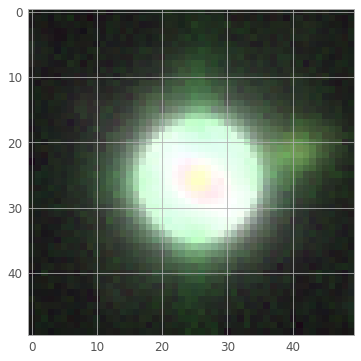

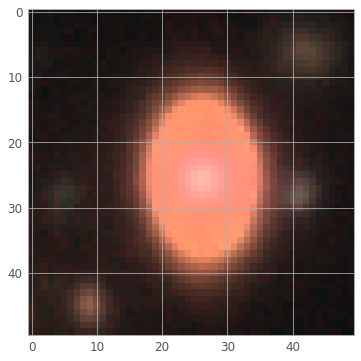

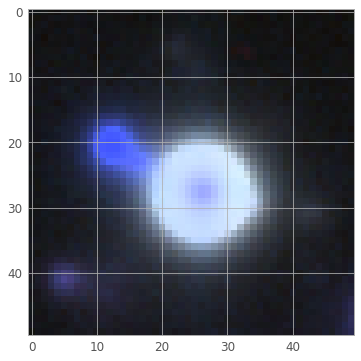

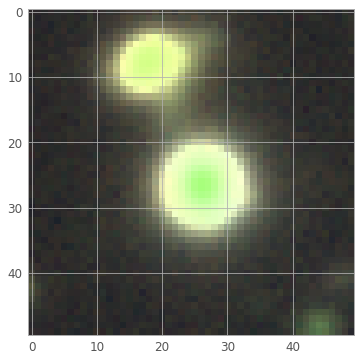

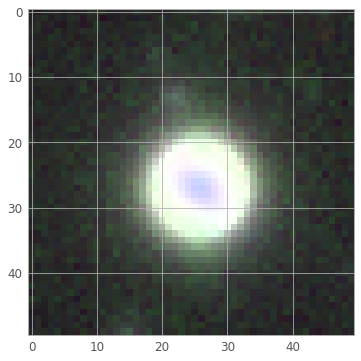

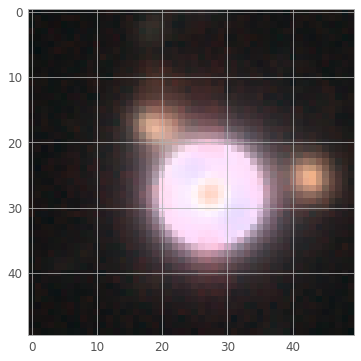

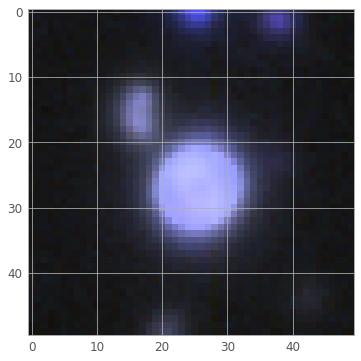

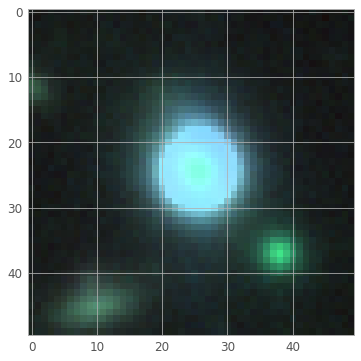

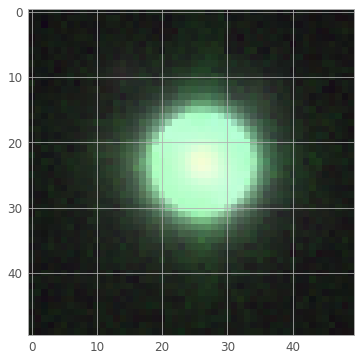

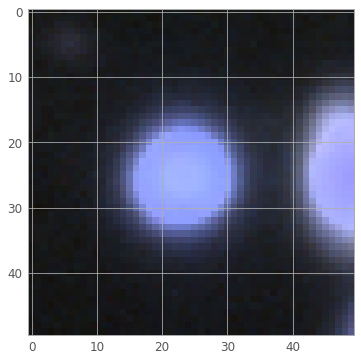

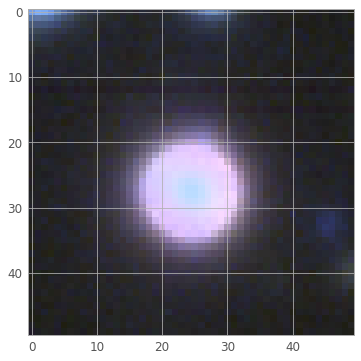

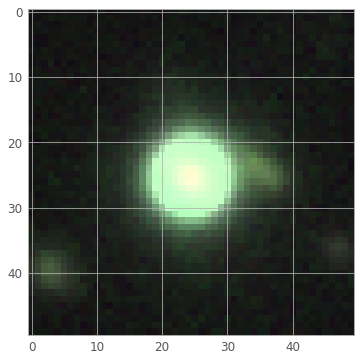

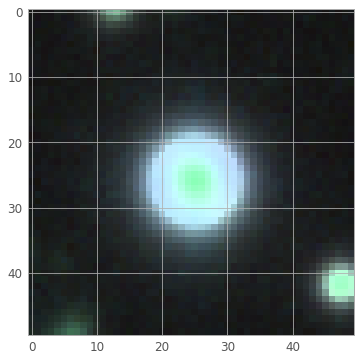

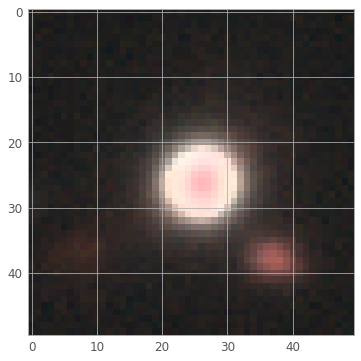

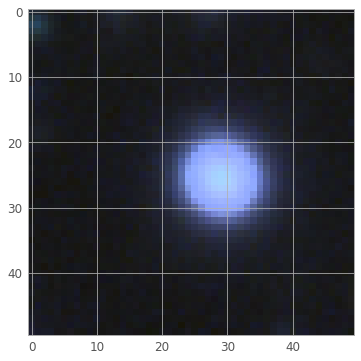

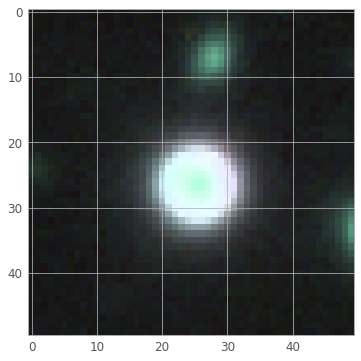

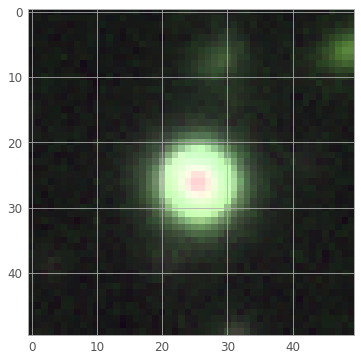

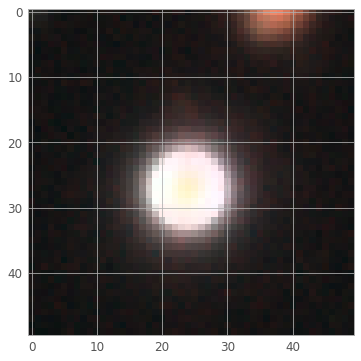

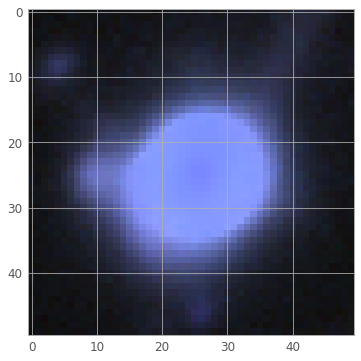

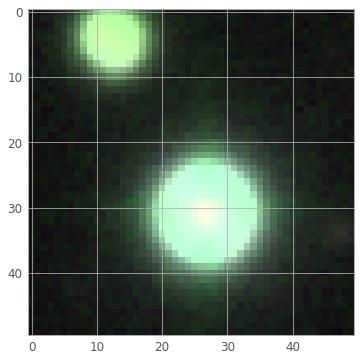

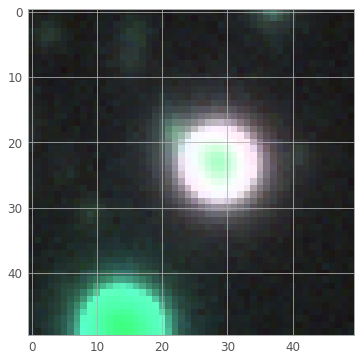

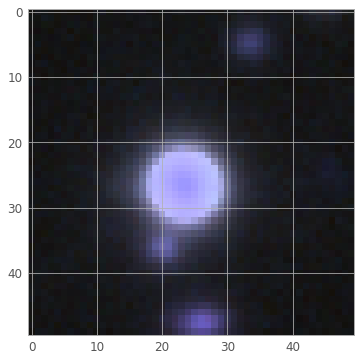

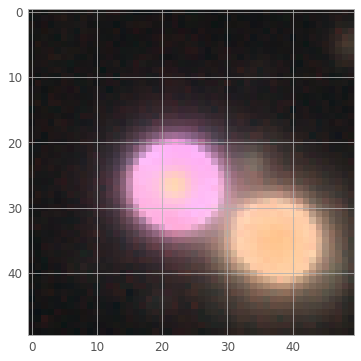

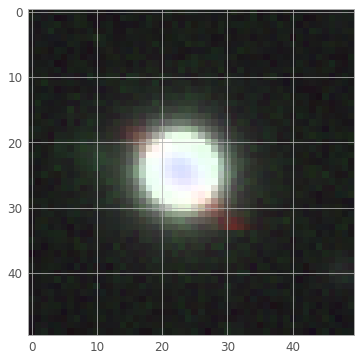

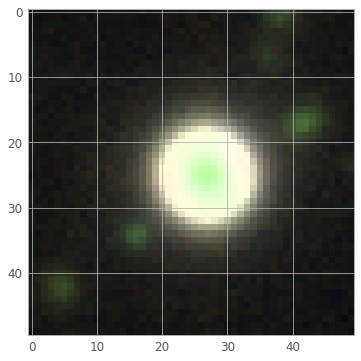

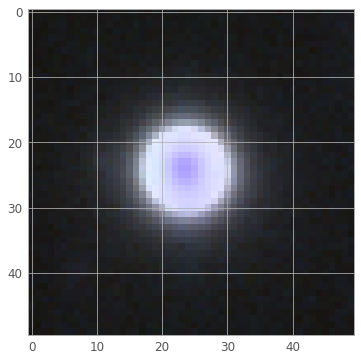

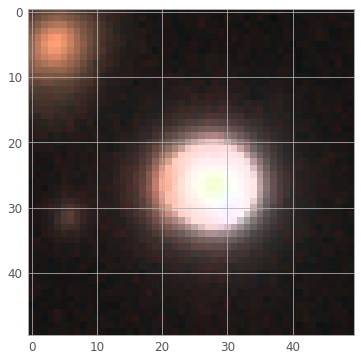

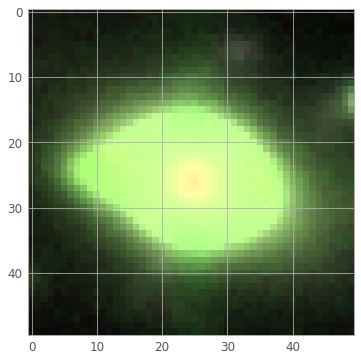

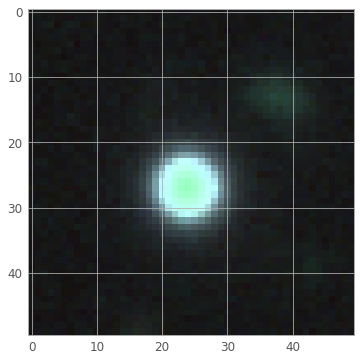

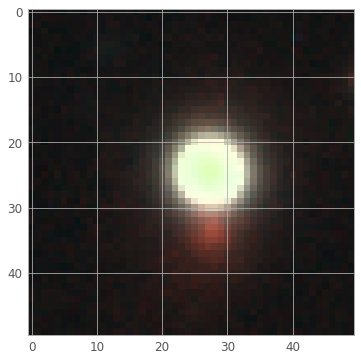

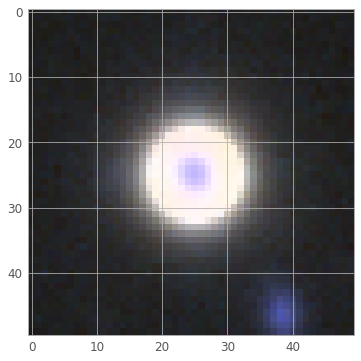

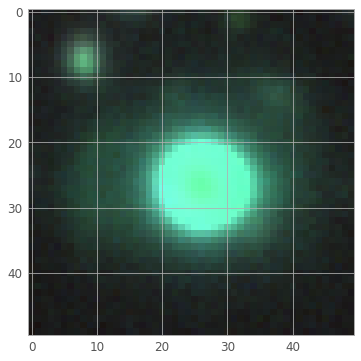

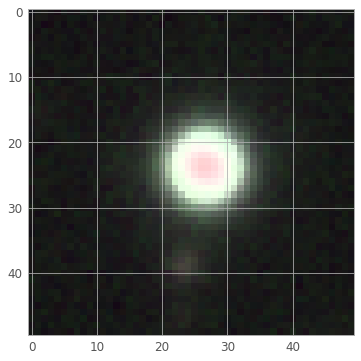

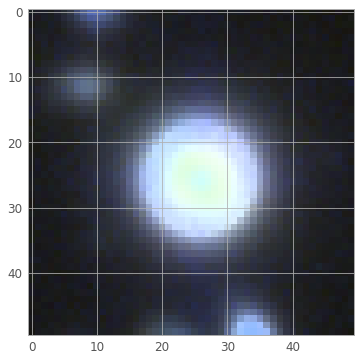

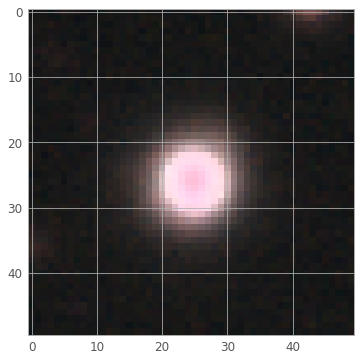

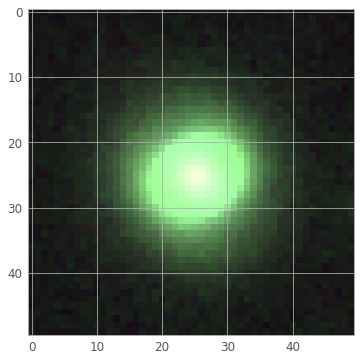

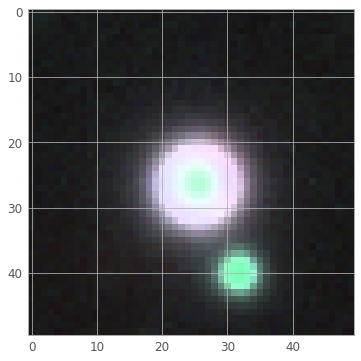

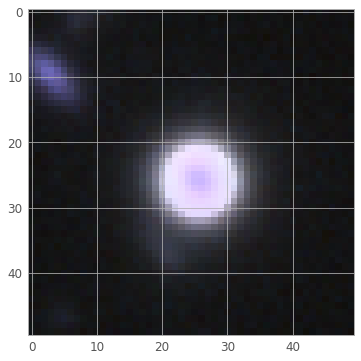

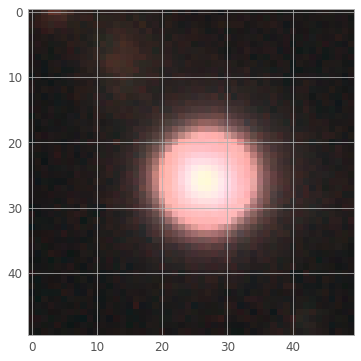

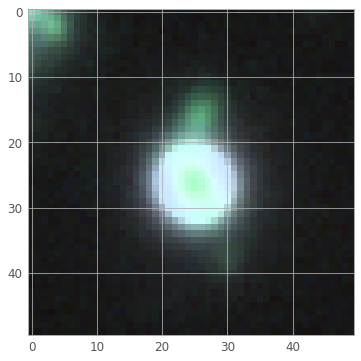

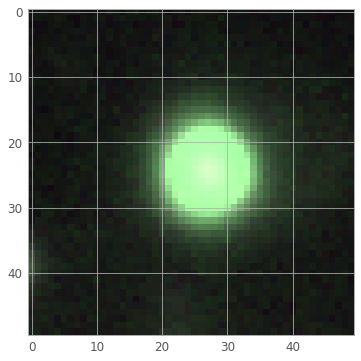

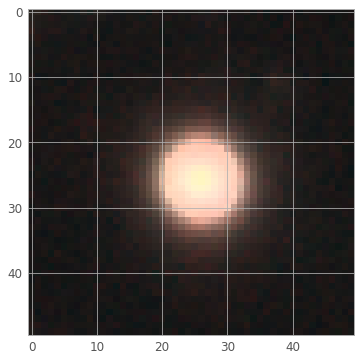

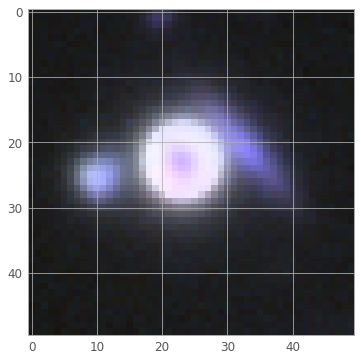

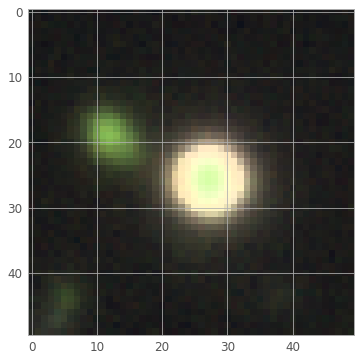

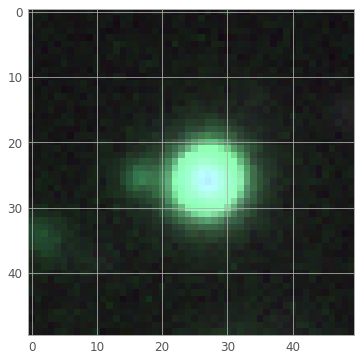

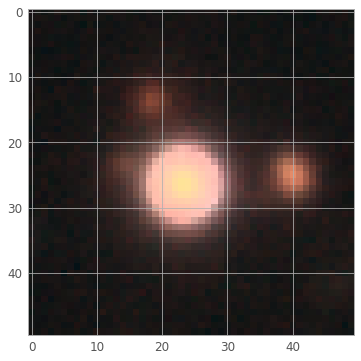

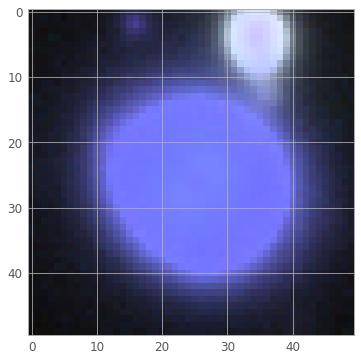

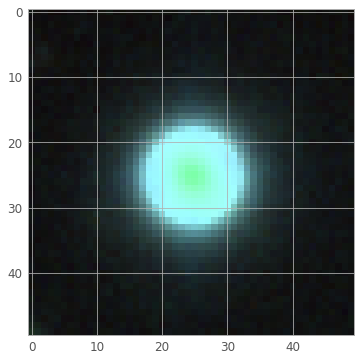

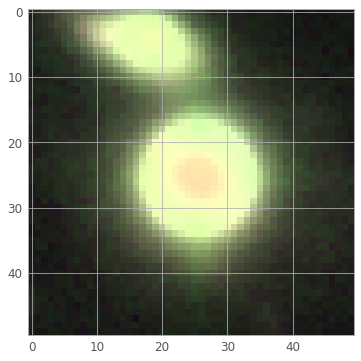

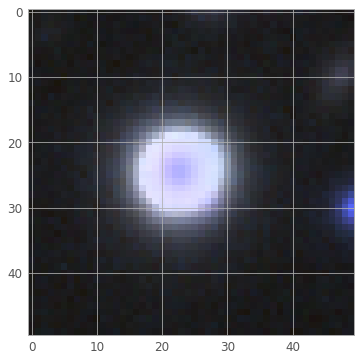

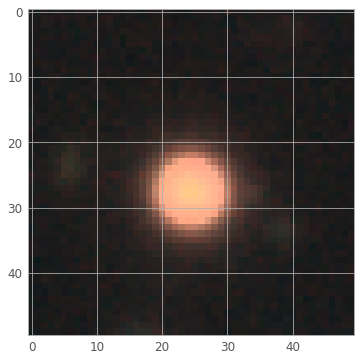

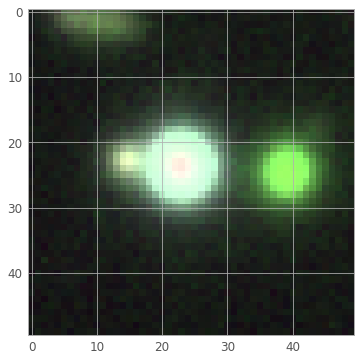

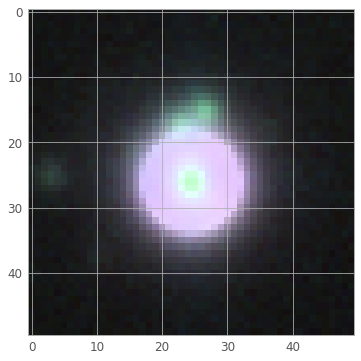

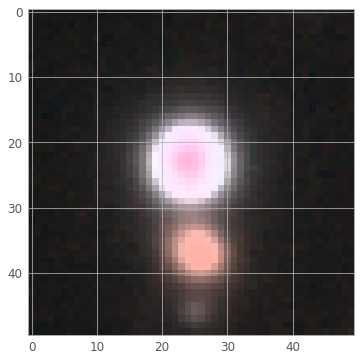

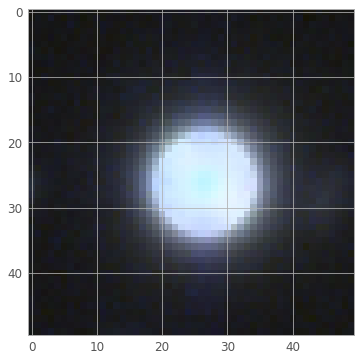

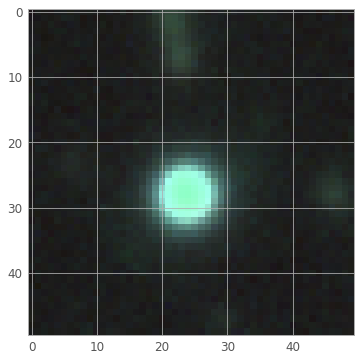

In [23]:
path = '/Users/rahim/Desktop/repo/AGN_Deblending/Extract/data/HSC_Images/'


#sort HSC fits files based on their starting name index in an ordered list
images = []
for i in range (2, len(os.listdir(path))+1): 
    for image in os.listdir(path):
        if re.match(str(i)+'-', image):
            images.append(fits.getdata(path + image))

            #save the fits images in a multidimensional array of size 5 each (i.e. based on the number of bands)
cube_stack = []
for i in range(0, len(images), 5):
    cube_stack.append(images[i : i+5]) 
    
#creat a folder to save the HSC_cube images    
path_hsc_cube = '/Users/rahim/Desktop/repo/AGN_Deblending/Extract/data/HSC_cube'

ind= 2
for i in cube_stack:

    img = np.stack([i], axis =0)[0, :, 25:75, 25:75]
    hdu = fits.PrimaryHDU(img)
    hdul = pf.HDUList([hdu])
#     hdul.writeto(path_hsc_cube + f'/{ind}-cube_hsc_image.fits')
    ind += 1

#     print(img.shape)

    asinh= scarlet.display.AsinhMapping(minimum=img.min(), stretch=1, Q=1)
    img_rgb= scarlet.display.img_to_rgb(img, norm=asinh)

    plt.imshow(img_rgb)
    plt.show()
